In [212]:
import numpy as np
import pandas as pd
from math import cos,pi

In [213]:
def monte_carlo(N,p="uniform",):
    X = []
    if p == "uniform":
        X = np.random.uniform(a,b,N)
        return ((b-a)/N)*np.sum(np.array([g(x) for x in X]))
    if p == "linear":
        while (len(X)<N):
            point = np.random.uniform(0,1,2)
            x0,y0= a+point[0]*(b-a),point[1]*(4/pi)
            if (0<=y0<=linear_p(x0)):
                X.append(x0)
    X = np.array(X)
    return (1/N)*np.sum(np.array([g(x)/linear_p(x) for x in X]))
   

In [230]:
def monte_carlo_square(N):
    k=0
    X = np.array([(np.random.uniform(a,b), np.random.uniform(0, 1)) for i in range(N)])
    for i in range(N):
        if X[i,1] <= g(X[i,0]):
            k+=1
    return (k/N)*(pi/2)

In [231]:
def g(x):
    return cos(x)

a,b = 0,pi/2

In [232]:
def linear_p(x):
    return 4/pi-(8*x)/pi**2

In [236]:
ans = pd.DataFrame(columns=["N","Равномерная плотность","Линейная плотность","Площадь"])
for i in range(2,6):
    row = [10**(i),abs(1-monte_carlo(10**(i))),abs(1-monte_carlo(10**(i),"linear")),abs(1-monte_carlo_square(10**(i)))]
    ans = ans.append(pd.Series(row,index=ans.columns),True)
ans

,N,Равномерная плотность,Линейная плотность,Площадь
0,100.0,0.054742,6.606949e-03,0.021018
1,1000.0,0.017455,8.031963e-03,0.000974
2,10000.0,0.002648,2.172157e-03,0.002073
3,100000.0,0.000819,2.729604e-07,0.001540


1.0304423903774522

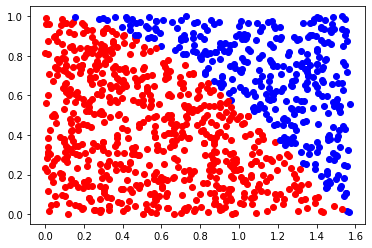

In [227]:
monte_carlo_square(1000)